In [2]:
import pandas as pd
import seaborn as sns

### 데이터 전처리

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 데이터 불러와서 합치
bikes = pd.DataFrame()
for i in range(1, 4):
    bikes_temp = pd.read_csv(f"data/서울특별시 공공자전거 대여정보_201906_{i}.csv", encoding="cp949")
    bikes = pd.concat([bikes, bikes_temp]) # bikes 안에 bikes_temp 정보를 누적시킨다.

bikes.isnull().sum()
bikes['대여일시'] = bikes['대여일시'].astype('datetime64[ms]')

# 파생변수 '요일', '일자', '대여시간대', '주말구분'
요일 = ['월', '화', '수', '목', '금', '토', '일']
bikes['요일'] = bikes['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])
bikes['일자'] = bikes['대여일시'].dt.day
bikes['대여시간대'] = bikes['대여일시'].dt.hour
# 만약 x가 5 미만이면 평일, 아니라면 주말
bikes['주말구분'] = bikes['대여일시'].dt.dayofweek.apply(lambda x : '평일' if x < 5 else '주말')

# 위도, 경도 파일 Merge
bike_shop = pd.read_csv("data/공공자전거 대여소 정보_23_06.csv", encoding="cp949")
bike_gu = bike_shop[['자치구', '대여소번호', '보관소(대여소)명', '위도', '경도']]
bike_gu = bike_gu.rename(columns={'보관소(대여소)명':'대여소명'})
bikes = pd.merge(bikes, bike_gu, left_on='대여 대여소번호', right_on = '대여소번호')
bikes = bikes.drop(['대여소번호', '대여소명'], axis=1)
bikes = bikes.rename(columns={'자치구':'대여구', '위도':'대여점 위도', '경도':'대여점 경도'})

<Axes: xlabel='요일', ylabel='count'>

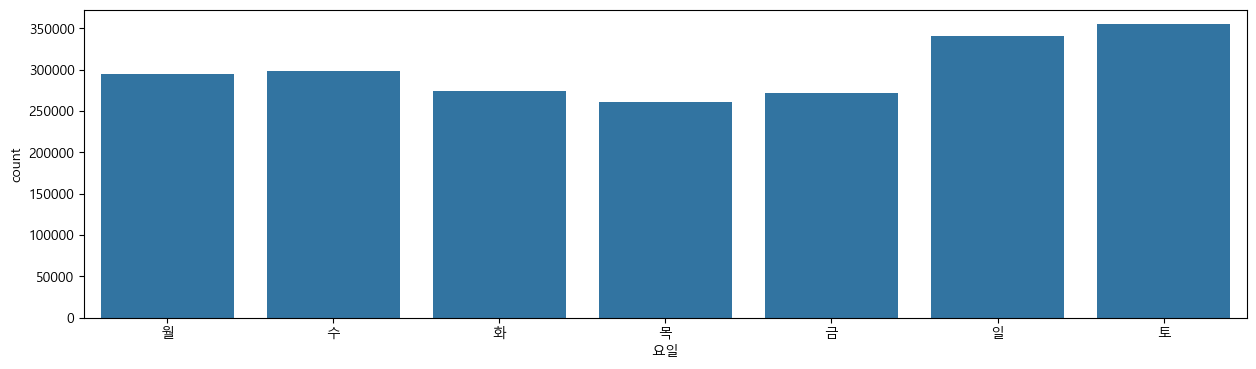

In [4]:
# 시간 개념에 따른 데이터 분석
# 1. 요일별 따릉이 이용건수

plt.figure(figsize = (15, 4))
sns.countplot(data=bikes, x='요일')


<Axes: xlabel='일자', ylabel='count'>

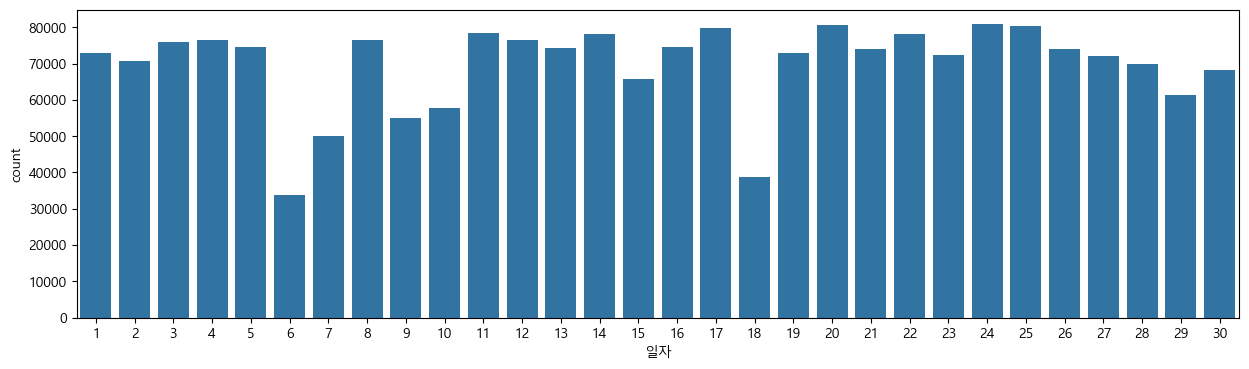

In [5]:
# 2. 일자별 따릉이 이용건수

plt.figure(figsize = (15, 4))
sns.countplot(data=bikes, x='일자')

<Axes: xlabel='대여시간대', ylabel='count'>

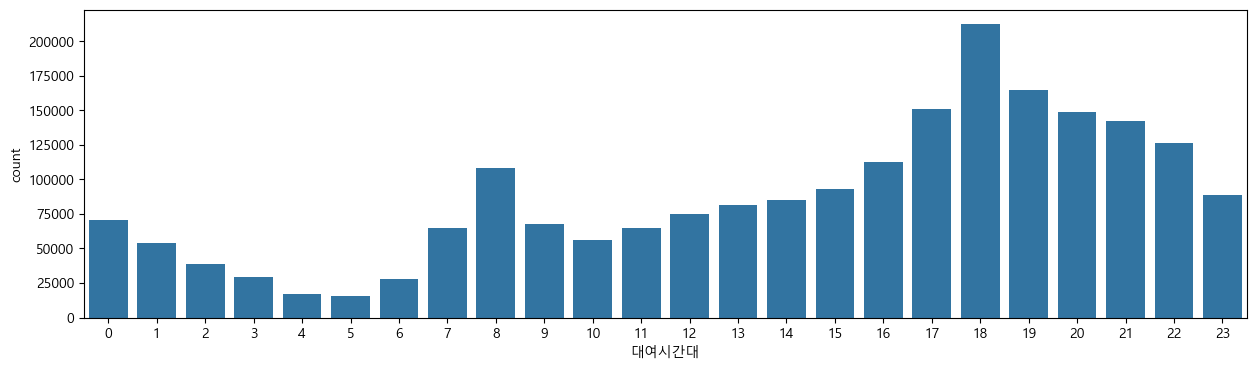

In [6]:
# 3. 대여시간대별 따릉이 이용건수

plt.figure(figsize = (15, 4))
sns.countplot(data=bikes, x='대여시간대')

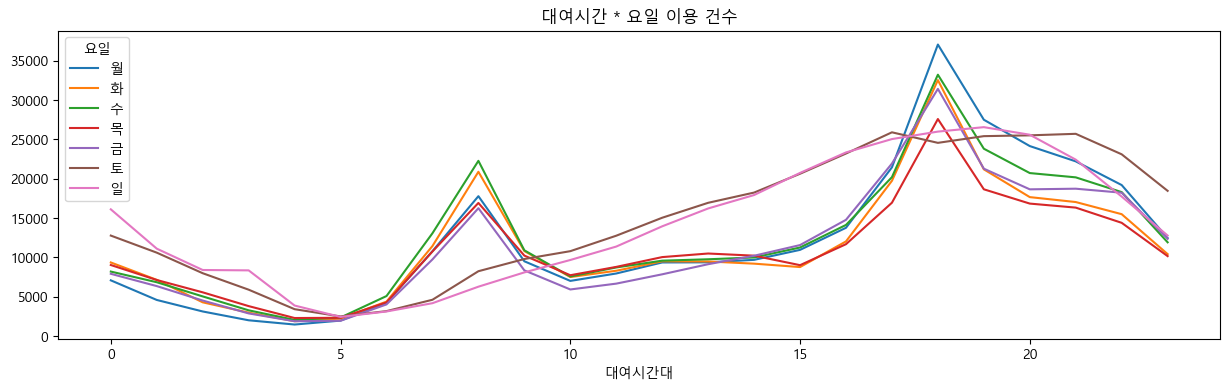

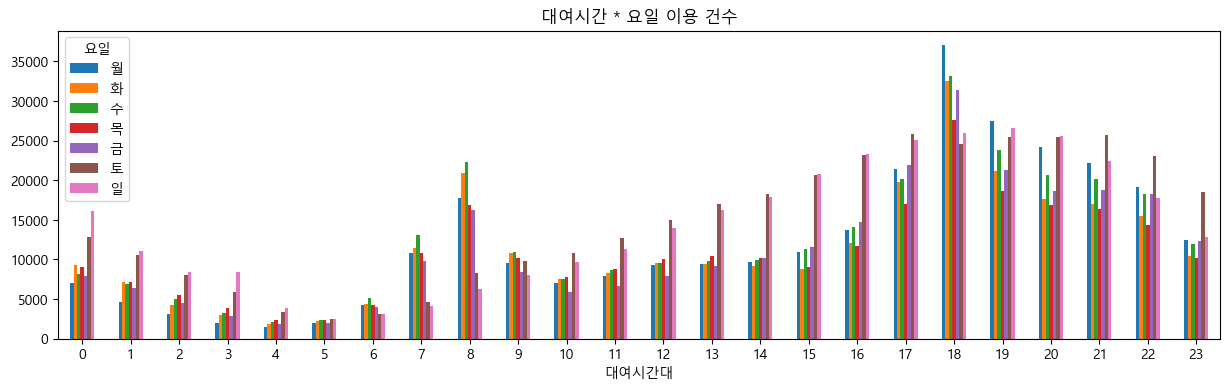

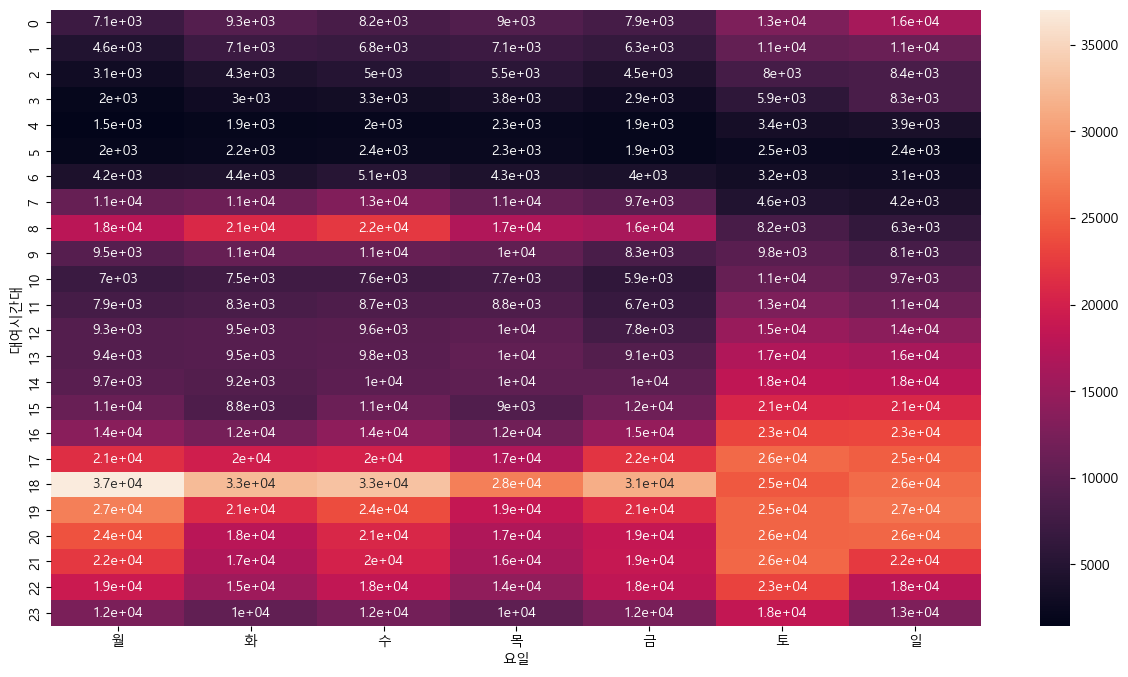

In [7]:
# 4. 대여시간대 & 요일 따릉이 이용건수

요일순서 = ['월','화','수','목','금','토','일']
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count').reindex(요일순서, axis=1) 
hourly_dayofweek_ride.plot(kind='line', title='대여시간 * 요일 이용 건수', figsize=(15,4))
plt.show()
hourly_dayofweek_ride.plot(kind='bar', title='대여시간 * 요일 이용 건수', figsize=(15,4), rot=0)
plt.show()
plt.figure(figsize=(15, 8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True)
plt.show()

In [8]:
# 5. 대여시간대 * 주말구분 따릉이 이용건수

hourly_week_ride = bikes.pivot_table(index='대여시간대', columns='주말구분', values='자전거번호', aggfunc='count')

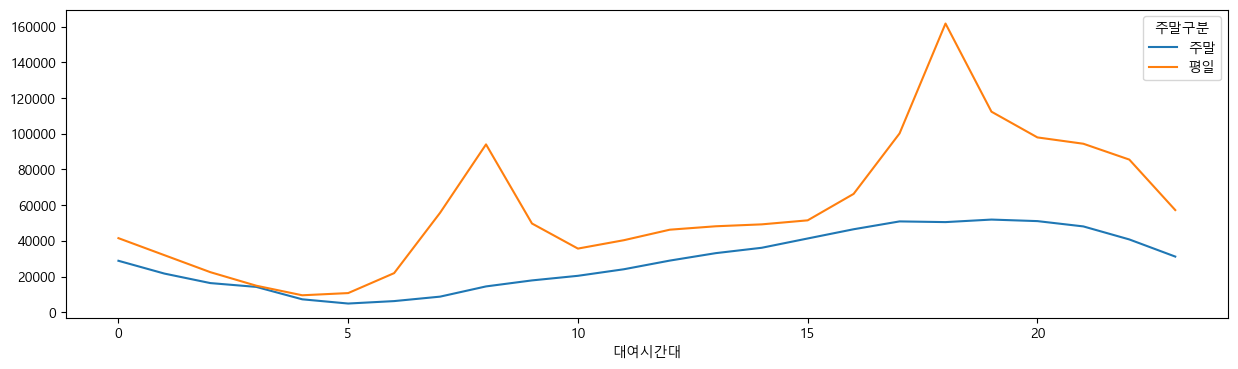

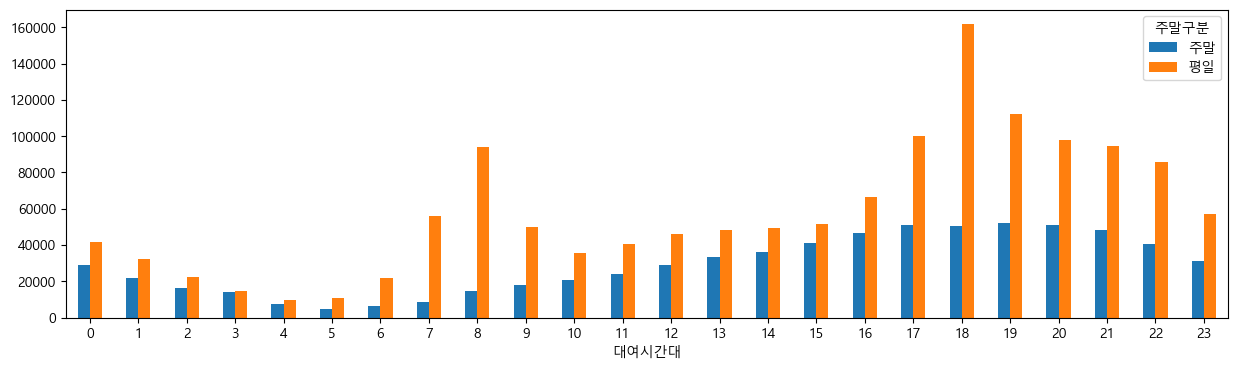

In [9]:
# pandas의 df.plot() 이용
# ; 을 붙이면 show()과 같은 의미
hourly_week_ride.plot(kind='line', figsize=(15, 4));
hourly_week_ride.plot(kind='bar', figsize=(15, 4), rot=0);

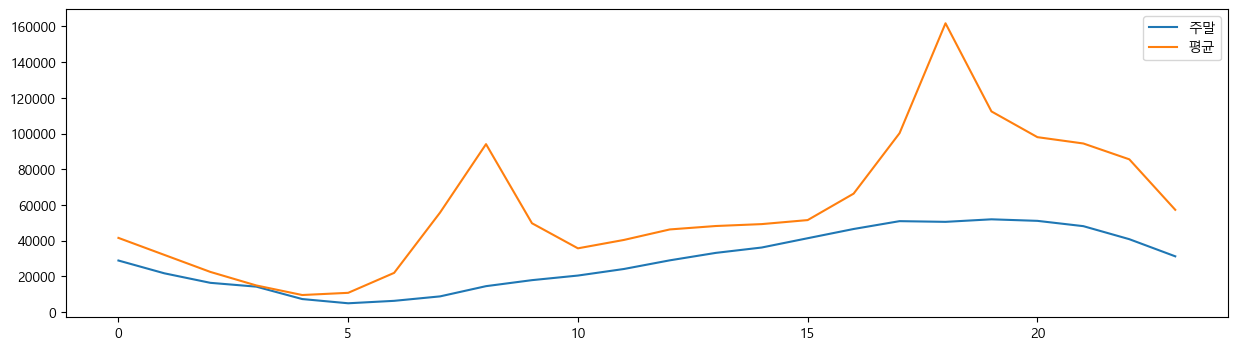

In [10]:
# matplotlib 이용

plt.figure(figsize=(15, 4))
plt.plot(hourly_week_ride.index, hourly_week_ride['주말'], label='주말')
plt.plot(hourly_week_ride.index, hourly_week_ride['평일'], label='평균')
plt.legend()
plt.show()

<Axes: xlabel='대여시간대', ylabel='이용시간'>

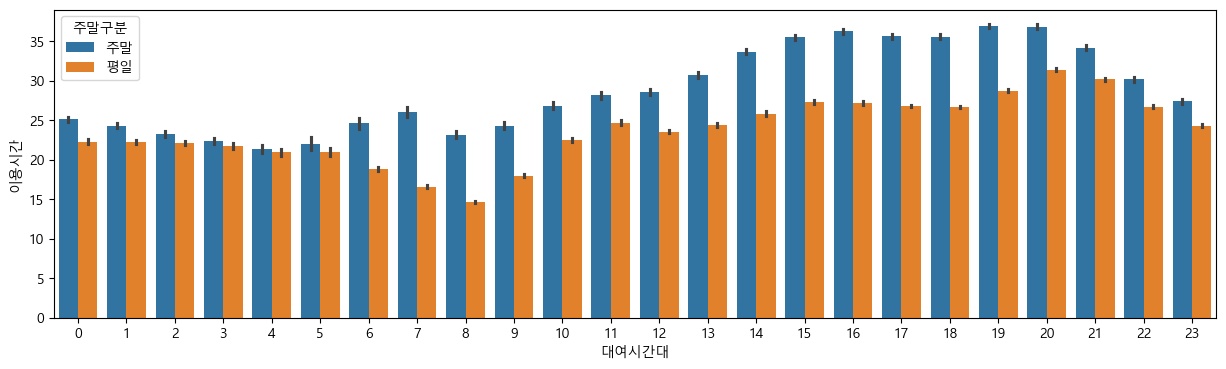

In [11]:
# seaborn 이용

plt.figure(figsize=(15, 4))
sns.lineplot(data=bikes, x='대여시간대', y='이용시간', hue='주말구분')

<Axes: xlabel='대여시간대', ylabel='count'>

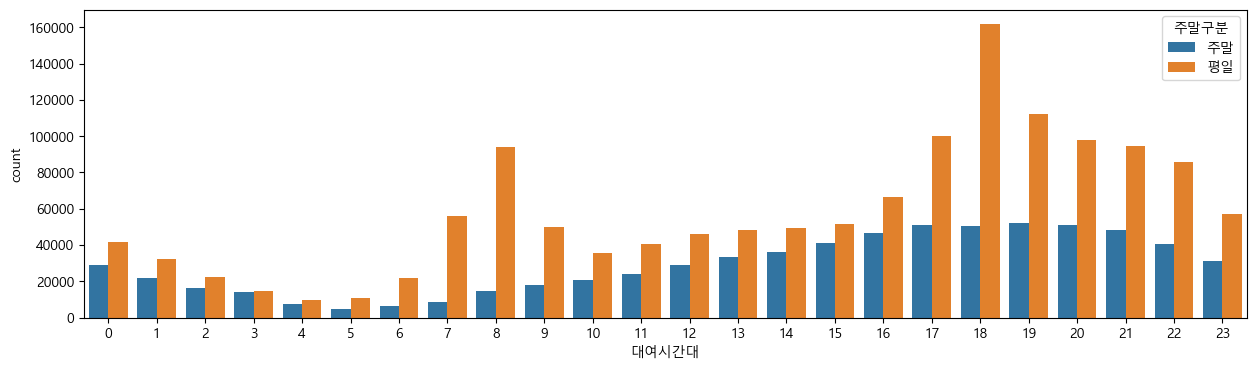

In [12]:
plt.figure(figsize=(15, 4))
sns.countplot(data=bikes, x='대여시간대', hue='주말구분')

---

In [13]:
bikes = pd.DataFrame()
for i in range(1, 4):
    bikes_temp = pd.read_csv(f"data/서울특별시 공공자전거 대여정보_201906_{i}.csv", encoding="cp949")
    bikes = pd.concat([bikes, bikes_temp]) # bikes 안에 bikes_temp 정보를 누적시킨다.

In [14]:
# 정보 확인
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215632 entries, 0 to 615720
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      int64  
 10  이용거리      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 202.8+ MB


In [15]:
# 비어있는 값이 있는지 확인
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

In [16]:
# int 형식의 수치 데이터 기초 통계 확인
bikes.describe()

,대여 대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06,2.215632e+06
mean,1.226154e+03,7.014750e+00,1.228354e+03,6.967391e+00,2.716998e+01,3.912916e+03
std,8.499197e+02,5.244626e+00,8.462296e+02,5.238154e+00,2.908119e+01,5.145471e+03
min,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.050000e+02,3.000000e+00,5.120000e+02,3.000000e+00,8.000000e+00,1.220000e+03
50%,1.159000e+03,6.000000e+00,1.159000e+03,6.000000e+00,1.700000e+01,2.270000e+03
75%,1.846000e+03,1.000000e+01,1.839000e+03,1.000000e+01,3.700000e+01,4.670000e+03
max,9.998000e+03,4.000000e+01,9.998000e+03,4.000000e+01,3.133000e+03,2.323100e+05


In [17]:
# 대여일시의 타입을 변경
bikes['대여일시'] = bikes['대여일시'].astype('datetime64[ms]')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215632 entries, 0 to 615720
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ms]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   int64         
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      int64         
 10  이용거리      float64       
dtypes: datetime64[ms](1), float64(1), int64(5), object(4)
memory usage: 202.8+ MB


In [18]:
# 대여일시 컬럼의 요일을 추출한다. 0 = 월요일 ~ 6 = 일요일
bikes['대여일시'].dt.dayofweek

0         0
1         0
2         2
3         2
4         0
         ..
615716    0
615717    1
615718    2
615719    3
615720    4
Name: 대여일시, Length: 2215632, dtype: int32

### apply 함수 연습
- 사용 방법 : apply(사용자 정의 함수), apply(람다식)

In [19]:
# apply란? 데이터프레임에 함수를 적용해주는 명령어
df = pd.DataFrame([[4,9], [1,4], [5,6]], columns=['A','B'])

def plus_one(x):
    x += 1
    return x

df['A'] = df['A'].apply(plus_one)

df

,A,B
0,5,9
1,2,4
2,6,6


In [20]:
# 람다 식 사용
df['B'] = df['B'].apply(lambda x : x+1)

df

,A,B
0,5,10
1,2,5
2,6,7


- '요일' 파생변수 생성 (월, 화, 수, ..., 일)

In [21]:
요일 = ['월', '화', '수', '목', '금', '토', '일']

In [22]:
bikes['요일'] = bikes['대여일시'].dt.dayofweek.apply(lambda x : 요일[x])
bikes['요일']

0         월
1         월
2         수
3         수
4         월
         ..
615716    월
615717    화
615718    수
615719    목
615720    금
Name: 요일, Length: 2215632, dtype: object

In [23]:
bikes.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월
2,SPB-20387,2019-06-05 08:27:47,646,장한평역 1번출구 (국민은행앞),1,2019-06-05 08:41:31,3,중랑센터,2,12,1930.0,수


In [24]:
bike_shop = pd.read_csv("data/공공자전거 대여소 정보_23_06.csv", encoding="cp949")

In [25]:
bike_shop.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR


In [26]:
bike_gu = bike_shop[['자치구', '대여소번호', '보관소(대여소)명', '위도', '경도']]

In [27]:
# 보관소(대여소)명을 대여소명으로 변경
bike_gu = bike_gu.rename(columns={'보관소(대여소)명':'대여소명'})

In [28]:
bike_gu.head(1)

,자치구,대여소번호,대여소명,위도,경도
0,종로구,301,경복궁역 7번출구 앞,37.575794,126.971451


In [29]:
bikes.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월


In [30]:
# bikes와 bike_gu의 대여 대여소번호와 대여소번호를 토대로 합침
bikes = pd.merge(bikes, bike_gu, left_on='대여 대여소번호', right_on = '대여소번호')

In [31]:
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,자치구,대여소번호,대여소명,위도,경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,646,장한평역 1번출구,37.561966,127.064506
1,SPB-07446,2019-06-03 08:33:22,526,용답토속공원 앞,8,2019-06-03 09:27:16,3,중랑센터,14,54,1180.0,월,성동구,526,용답토속공원 앞,37.563511,127.056725


In [32]:
# 대여소번호, 대여소명 열 삭제

bikes = bikes.drop(['대여소번호', '대여소명'], axis=1)

In [33]:
bikes.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,자치구,위도,경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506


In [34]:
bikes = bikes.rename(columns={'자치구':'대여구', '위도':'대여점 위도', '경도':'대여점 경도'})
bikes.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,요일,대여구,대여점 위도,대여점 경도
0,SPB-22040,2019-06-03 08:49:27,646,장한평역 1번출구 (국민은행앞),1,2019-06-03 09:17:10,3,중랑센터,14,27,1330.0,월,동대문구,37.561966,127.064506


### 대여시간대별, 요일별 대연 건수 분석
- pivot_table 이용

In [35]:
# 대여일시 컬럼의 시간 값을 가져와 대여시간대 컬럼에 삽입하여 생성
bikes['대여시간대'] = bikes['대여일시'].dt.hour

In [36]:
# index = 행, columns = 열, values = 주제, aggfunc = 값의 평균
hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')

In [37]:
# matplotlib.pyplot을 이용하여 글꼴 삽입
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

<Axes: title={'center': '대여시간 * 요일 이용 건수'}, xlabel='대여시간대'>

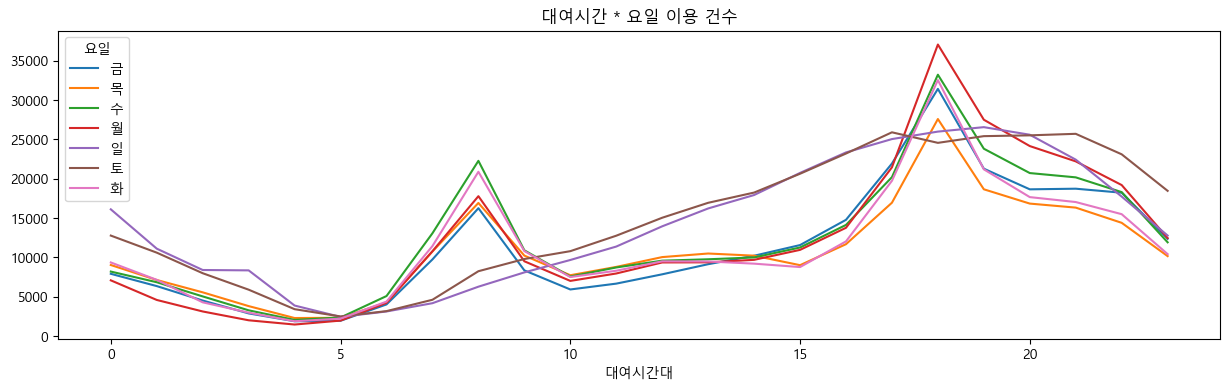

In [38]:
# kind = 그래프 종류, title = 타이틀, figsize = 그래프 크기
hourly_dayofweek_ride.plot(kind='line', title='대여시간 * 요일 이용 건수', figsize=(15,4))

<Axes: title={'center': '대여시간 * 요일 이용 건수'}, xlabel='대여시간대'>

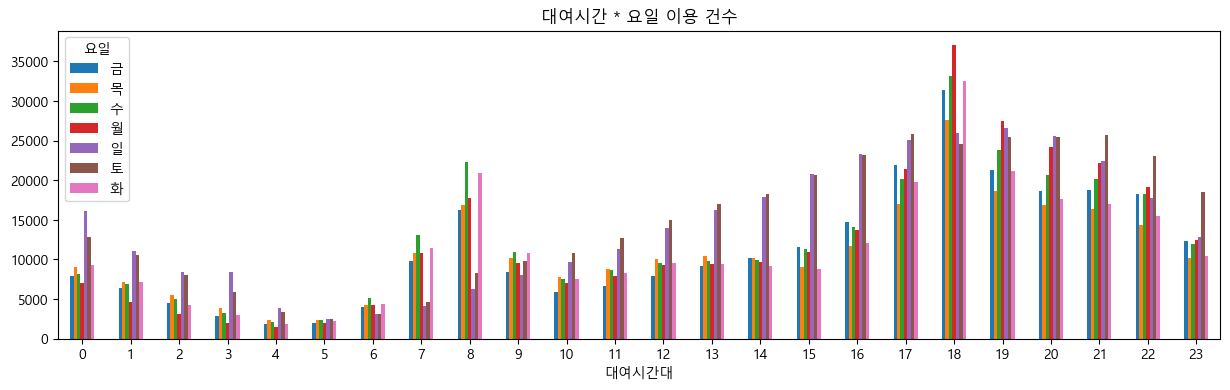

In [39]:
# kind를 bar 형태로 변경한 후 rot를 사용해 차트 가로열의 글씨를 정상적으로 만들어줌
hourly_dayofweek_ride.plot(kind='bar', title='대여시간 * 요일 이용 건수', figsize=(15,4), rot=0)

<Axes: xlabel='요일', ylabel='대여시간대'>

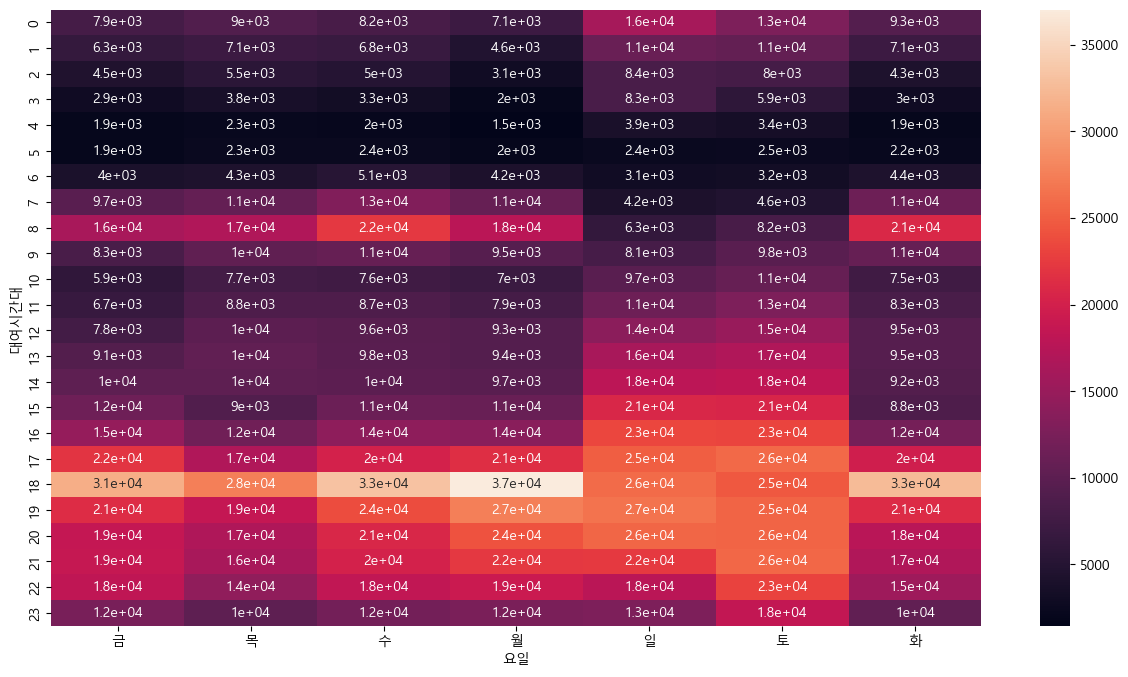

In [40]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True)

<Axes: xlabel='요일', ylabel='count'>

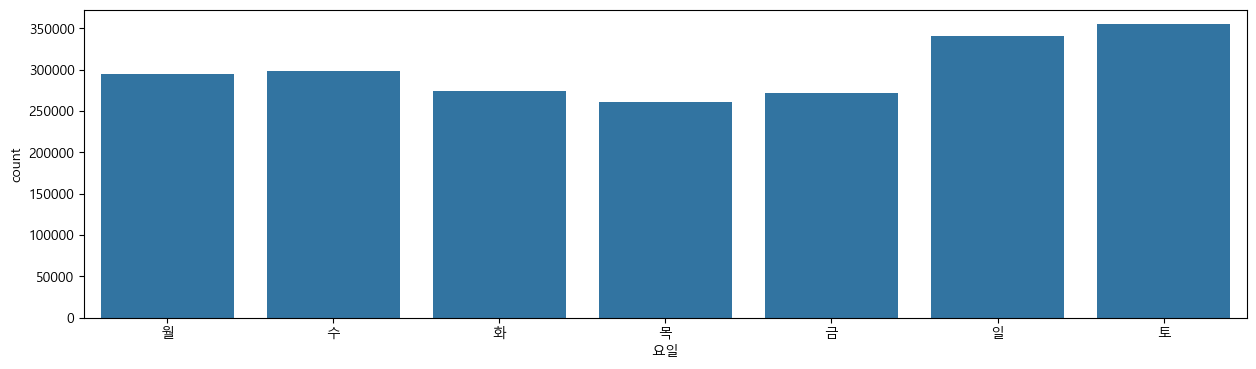

In [41]:
# 요일별 이용건수 분석

plt.figure(figsize = (15, 4))

sns.countplot(data=bikes, x='요일')

<Axes: xlabel='일자', ylabel='count'>

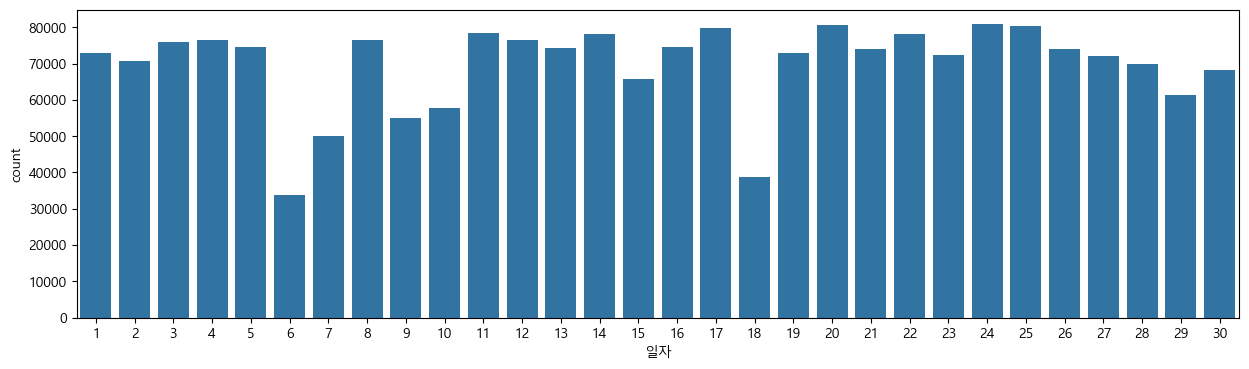

In [42]:
# 일자별로 이용수 분석

# 1단계 : '일자' 파생변수 생성
bikes['일자'] = bikes['대여일시'].dt.day

# 2단계 : 일자별 이용수 시각화
plt.figure(figsize = (15, 4))
sns.countplot(data=bikes, x='일자')

<Axes: xlabel='대여시간대', ylabel='count'>

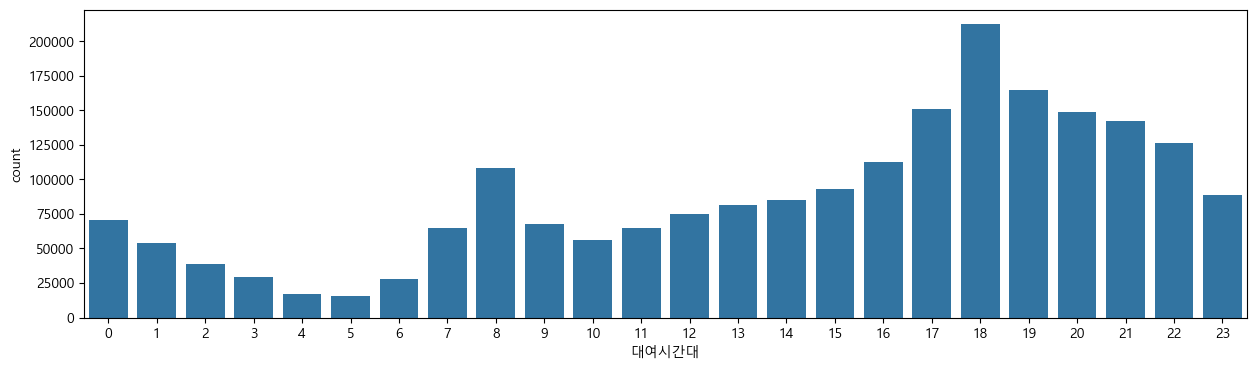

In [43]:
# 시간대 별 이용자 수 분석
plt.figure(figsize = (15, 4))
sns.countplot(data=bikes, x='대여시간대')